## Classifying Dog and Cat images using SVM

### 1. Import the dog vs cat image dataset from Kaggle and Extract it into the current folder
### 2. Create labels based on the file name

In [1]:
import numpy as np 
import sklearn as sk
import os
from PIL import Image 
from PIL import ImageFilter
from sklearn.svm import SVC

In [3]:
#get full dataset
train_images = [i for i in os.listdir('train')] 
print(train_images[0])

test_images = [i for i in os.listdir('test1')]
print(test_images[0])

dog.610.jpg
10964.jpg


### We then use the file names to determine the label
### So if the file name is dog.1.jpg it is given a label of 1 else 0

In [4]:
#We create a variable labels to store the labels
labels=[]
for i in train_images:
        if 'dog' in i:
            labels.append(1)
        else:
            labels.append(0)

### We then extract the features from the images using the pillow library
### We then train the svm model 

In [5]:
features=[]
pixel_value=0

#Here we are using the default RBF kernel as it took less
#time on the training data 

clf =  SVC()
#clf= SVC(kernel='linear')
#clf= SVC(kernel='poly')

for i in train_images:
    im = Image.open('train/'+i).convert('L')
    size=64,64

    im = im.resize(size, Image.ANTIALIAS)
    im =im.filter(ImageFilter.FIND_EDGES)
    pixel_value=im.histogram() 
    features.append(pixel_value)

#Training the svm model
clf = clf.fit(features,labels)

### We then calculate the model accuracy on the training data set

In [6]:
results=[]
total=0

for i in train_images[0:100]:
    im = Image.open('train/'+i).convert('L')
    size=64,64
    im = im.resize(size, Image.ANTIALIAS)
    im =im.filter(ImageFilter.FIND_EDGES)
    pixel_value=im.histogram() 
    x = clf.predict([pixel_value])
    results.append(x[0])  

print("Length",len(results))

total=np.sum(np.logical_and(labels[0:100],results))

print("Accuracy:",total,"/",len(results),"* 100 =","{0:.3f}".format(total/len(results)*100),"%")

Length 100
Accuracy: 37 / 100 * 100 = 37.000 %


### We then test it on the unlabeled test data 

In [7]:
results=[]

for i in test_images[0:5]:
    print(i)
    im = Image.open('test1/'+i).convert('L')
    size=64,64
    im = im.resize(size, Image.ANTIALIAS)
    im =im.filter(ImageFilter.FIND_EDGES)
    pixel_value=im.histogram() 
    x = clf.predict([pixel_value])
    
    print(x)
    results.append(x)  

print("Length",len(results))

10964.jpg
[1]
10167.jpg
[1]
179.jpg
[0]
8308.jpg
[0]
6015.jpg
[0]
Length 5


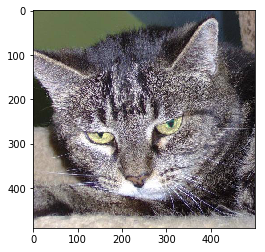

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Model predicted it to be a dog
img=mpimg.imread('test1/10964.jpg')
imgplot = plt.imshow(img)

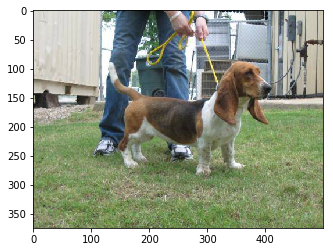

In [10]:
#Model predicted it to be a dog
img=mpimg.imread('test1/10167.jpg')
imgplot = plt.imshow(img)

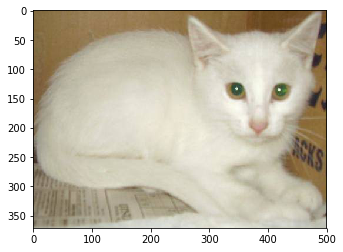

In [13]:
#Model pridected it to be a cat
img=mpimg.imread('test1/6015.jpg')
imgplot = plt.imshow(img)